In [1]:
!pip install wget

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=de4fd33328fd60423b16174dc4a9d11b0f8e62f27838dbafbea3776792b9725c
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from tqdm import tqdm
import os
import wget

Source : https://www.kaggle.com/cosmos98/twitter-and-reddit-sentimental-analysis-dataset
### **Context**

This is was a Dataset Created as a part of the university Project On Sentimental Analysis On Multi-Source Social Media Platforms using PySpark.

There two datasets Respectively one Consists of Tweets from Twitter with Sentimental Label and the other from Reddit which Consists of Comments with its Sentimental Label.

    Twitter Dataset

### **2.Reddit Dataset**

All these Tweets and Comments were extracted using there Respective Apis Tweepy and PRAW.
These tweets and Comments Were Made on Narendra Modi and Other Leaders as well as Peoples Opinion Towards the Next Prime Minister of The Nation ( In Context with General Elections Held In India - 2019).
All the Tweets and Comments From twitter and Reddit are Cleaned using Pythons re and also NLP with a Sentimental Label to each ranging from -1 to 1.

    0 Indicating it is a Neutral Tweet/Comment
    2.1 Indicating a Postive Sentiment
    3.-1 Indicating a Negative Tweet/Comment

### **Content**

Twitter.csv Dataset has around 163K Tweets along with Sentiment Labels.
Reddit.csv Dataset has around 37K Comments along with its Sentimental Label
So Generally Each Dataset has two columns, the first column has the cleaned tweets and Comments and the Second one indicates its Sentimental Label
Acknowledgements

This Dataset was Created with the help of my fellow teammates who passionately worked hard to gather more data with the help of the Tweepy and Reddit Apis. My Project Coordinator encouraged us to collect as much data as possible and he was the main motivation behind Implementing Sentimental Analysis on Multi-Source Social Media Platforms rather than a Single Platform Such as Twitter.

In [3]:
if os.path.isfile('archive.zip'):
    print("File Sudah ada")
else:
    wget.download(
        url='https://drive.google.com/uc?export=download&id=1_x2NQYXWuCv-JUK8Sdq9JD5qfpQ5c3DD'
    )
    print("\nDownload Selesai")


Download Selesai


In [4]:
with zipfile.ZipFile('archive.zip', mode='r') as zip_file:
    for zf in tqdm(zip_file.infolist(), desc="Extracting"):
        try:
            zip_file.extract(zf)                
        except Exception as e:
            print(e)
zip_file.close()

Extracting: 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]


In [176]:
df_reddit = pd.read_csv('/content/Reddit_Data.csv')
df_reddit.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [177]:
df_reddit.shape

(37249, 2)

In [178]:
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [179]:
df_reddit.clean_comment = df_reddit.clean_comment.astype(str)
df_reddit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37249 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [180]:
df_reddit['category']=df_reddit['category'].map({0:'Neutral', 1:'Postive', -1:'Negative'})
df_reddit.category.unique()

array(['Postive', 'Negative', 'Neutral'], dtype=object)

In [181]:
df_reddit.head()

,clean_comment,category
0,family mormon have never tried explain them t...,Postive
1,buddhism has very much lot compatible with chr...,Postive
2,seriously don say thing first all they won get...,Negative
3,what you have learned yours and only yours wha...,Neutral
4,for your own benefit you may want read living ...,Postive


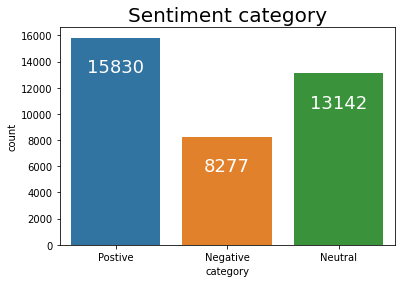

In [182]:
ax = sns.countplot(x='category', data=df_reddit)
ax.set_title('Sentiment category', fontsize=20)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white', size=18)
plt.show()

In [183]:
category = pd.get_dummies(df_reddit.category)
df_baru = pd.concat([df_reddit, category], axis=1)
df_baru = df_baru.drop(columns='category')
df_baru.head()

,clean_comment,Negative,Neutral,Postive
0,family mormon have never tried explain them t...,0,0,1
1,buddhism has very much lot compatible with chr...,0,0,1
2,seriously don say thing first all they won get...,1,0,0
3,what you have learned yours and only yours wha...,0,1,0
4,for your own benefit you may want read living ...,0,0,1


### Pisah Data training dan testing

In [184]:
from sklearn.model_selection import train_test_split

In [185]:
df_baru[['Negative','Neutral', 'Postive']]

,Negative,Neutral,Postive
0,0,0,1
1,0,0,1
2,1,0,0
3,0,1,0
4,0,0,1
...,...,...,...
37244,0,1,0
37245,0,0,1
37246,0,1,0
37247,0,0,1


In [186]:
kalimat = df_baru['clean_comment'].values
y = df_baru[['Negative','Neutral', 'Postive']].values
kalimat_latih, kalimat_test, y_latih, y_test = train_test_split(kalimat, y, test_size=0.2, stratify=y)
kalimat_latih.shape, kalimat_test.shape, y_latih.shape, y_test.shape

((29799,), (7450,), (29799, 3), (7450, 3))

In [187]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [188]:
kalimat_latih

array([' team ppr need stew oak landry ',
       'chaliye net neutrality vanakkam', ' bjp toh giyo jpg 400 ', ...,
       'holy cow have tldr this what gonna happen when you pair poor computer literacy lazy programmers old cyber infrastructure fake pateriotism and lack will for security public ',
       'pmed', ' love this guy '], dtype=object)

In [189]:
tokenizer = Tokenizer(num_words=50000, oov_token='<OOV>')
tokenizer.fit_on_texts(kalimat_latih) 
tokenizer.fit_on_texts(kalimat_test)

In [190]:
sekuens_latih = tokenizer.texts_to_sequences(kalimat_latih)
sekuens_test = tokenizer.texts_to_sequences(kalimat_test)

In [191]:
padded_latih = pad_sequences(sekuens_latih) 
padded_test = pad_sequences(sekuens_test)

In [192]:
padded_latih

array([[    0,     0,     0, ..., 14016,  6140,  5877],
       [    0,     0,     0, ...,  1905,  3730,  3651],
       [    0,     0,     0, ..., 27343,   536,  3370],
       ...,
       [    0,     0,     0, ...,     6,   700,   236],
       [    0,     0,     0, ...,     0,     0, 49258],
       [    0,     0,     0, ...,   192,     5,   165]], dtype=int32)

In [193]:
max(len(i) for i in sekuens_latih)

1307

In [194]:
max(len(i) for i in sekuens_test)

1301

### Coba tanpa truncate

In [195]:
padded_latih = pad_sequences(sekuens_latih, padding='post') 
padded_test = pad_sequences(sekuens_test, padding='post')

In [198]:
padded_latih

array([[  108,   607,   101, ...,     0,     0,     0],
       [ 3369,  1905,  3730, ...,     0,     0,     0],
       [   21,  1034, 27343, ...,     0,     0,     0],
       ...,
       [ 1011,   490,    11, ...,     0,     0,     0],
       [49258,     0,     0, ...,     0,     0,     0],
       [  192,     5,   165, ...,     0,     0,     0]], dtype=int32)

In [199]:
model = tf.keras.Sequential([
        keras.layers.Embedding(50000, 128),
        keras.layers.Dropout(0.2),
        keras.layers.Bidirectional(keras.layers.LSTM(128)),
        keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation='relu'),
        keras.layers.Dense(3, activation='softmax')
])

In [200]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 128)         6400000   
_________________________________________________________________
dropout_21 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
bidirectional_7 (Bidirection (None, 256)               263168    
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 32)                8224      
_________________________________________________________________
dense_21 (Dense)             (None, 3)                 99        
Total params: 6,671,491
Trainable params: 6,671,491
Non-trainable params: 0
___________________________________________

In [202]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.92):
      print("\nAkurasi telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [203]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [170]:
model.compile?

In [171]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [204]:
history = model.fit(padded_latih, y_latih, epochs=100, 
                    validation_data=(padded_test, y_test), verbose=2, callbacks=[callbacks])

Epoch 1/100
932/932 - 396s - loss: 0.5209 - accuracy: 0.7920 - val_loss: 0.2713 - val_accuracy: 0.9119
Epoch 2/100
932/932 - 373s - loss: 0.1898 - accuracy: 0.9397 - val_loss: 0.2368 - val_accuracy: 0.9255

Akurasi telah mencapai >92%!


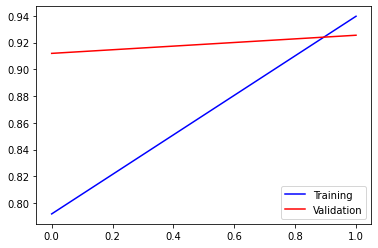

In [205]:
plt.plot(history.history['accuracy'],c='b',label='Training')
plt.plot(history.history['val_accuracy'],c='r',label='Validation')
plt.legend(loc='lower right')
plt.show()

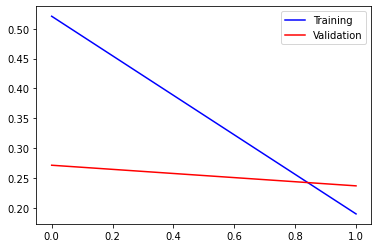

In [206]:
plt.plot(history.history['loss'],c='b',label='Training')
plt.plot(history.history['val_loss'],c='r',label='Validation')
plt.legend(loc='upper right')
plt.show()

In [217]:
def predict(s):
    X_tes=[]
    X_tes.append(s)
    X_test=tokenizer.texts_to_sequences(X_tes)
    X_test_padded=pad_sequences(X_test,padding='post',truncating='post')
    predict_index = np.argmax(model.predict(X_test_padded))

    if predict_index == 0:
      return 'negative comment'
    elif predict_index == 1: 
      return 'Neutral comment'
    else:
      return 'Postive comment'

In [218]:
predict("You're an idiot, damn you haven't made content yet ")

'negative comment'

In [219]:
predict("you're great bro, your content is really good keep it up")

'Postive comment'

In [220]:
predict('no comments, just the usual content')

'negative comment'

In [234]:
predict("I'm just a fan ")

'Neutral comment'